In [2]:
# Importar librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Obteniendo dataset desde github

df = pd.read_csv('https://raw.githubusercontent.com/adolfomaltez/InteligenciaArtificial/main/datasets/vw_examinados.csv', sep=';')
df.head()

,codigo_carga,tipo_asignatura,codigo_asignatura,Asignatura,Seccion,Horario,Dias,inscritos_materia,parcial,fechaparcial,Fecha_Registro,asistencia,TipoExamen,Coordinacion_Catedra,Coordinador_Catedratico,Escuela,Facultad
0,SEMI-H_01_02-2020,P,SEMI-H,SEMINARIO DE INVESTIGACION,1,08:00-09:30,Lu-Vie,18,1,24/8/2020,1/9/2020 09:54,17,Ordinario,COMUNICACIÓN ESPECIALIZADA,Aldo Valentín Maldonado Ortiz,Escuela de Comunicaciones,Facultad de Ciencias Sociales
1,TCOM-H_03_02-2020,P,TCOM-H,TEORIA DE LA COMUNICACIÓN,3,13:00-16:00,Sab,18,1,22/8/2020,28/8/2020 15:27,14,Ordinario,COMUNICACIÓN BÁSICA,Rosalina Rodríguez Rivera,Escuela de Comunicaciones,Facultad de Ciencias Sociales
2,COME-E_01_02-2020,P,COME-E,COMUNICACION EMPRESARIAL,1,06:30-08:00,Mie-Sab,89,1,26/8/2020,28/8/2020 15:27,87,Ordinario,COMUNICACIÓN BÁSICA,Rosalina Rodríguez Rivera,Escuela de Comunicaciones,Facultad de Ciencias Sociales
3,PDTV-H_02_02-2020,P,PDTV-H,PRODUCCION EN TELEVISION,2,18:40-20:10,Ma-Jue,44,1,25/8/2020,28/8/2020 15:28,45,Ordinario,COMUNICACIÓN ESPECIALIZADA,Aldo Valentín Maldonado Ortiz,Escuela de Comunicaciones,Facultad de Ciencias Sociales
4,EDPRO-H_02_02-2020,P,EDPRO-H,EDITORIAL Y PROPAGANDA,2,18:40-20:10,Ma,32,1,25/8/2020,28/8/2020 15:28,31,Ordinario,REDACCIÓN,Antonio Herrera Palacios,Escuela de Comunicaciones,Facultad de Ciencias Sociales


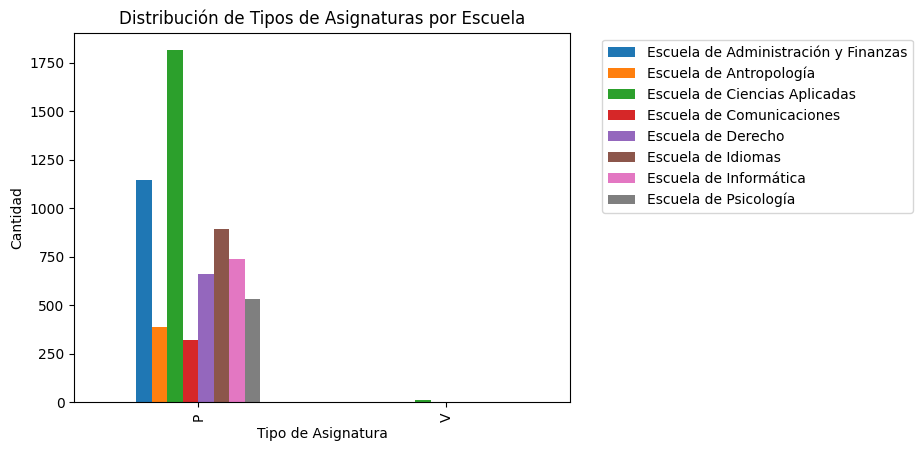

In [4]:
# 1. Cuál es la distribución de tipos de asignaturas en el conjunto de datos por Escuela?

df.groupby(['tipo_asignatura', 'Escuela'])['tipo_asignatura'].count().unstack().plot(kind='bar')
plt.title('Distribución de Tipos de Asignaturas por Escuela')
plt.xlabel('Tipo de Asignatura')
plt.ylabel('Cantidad')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

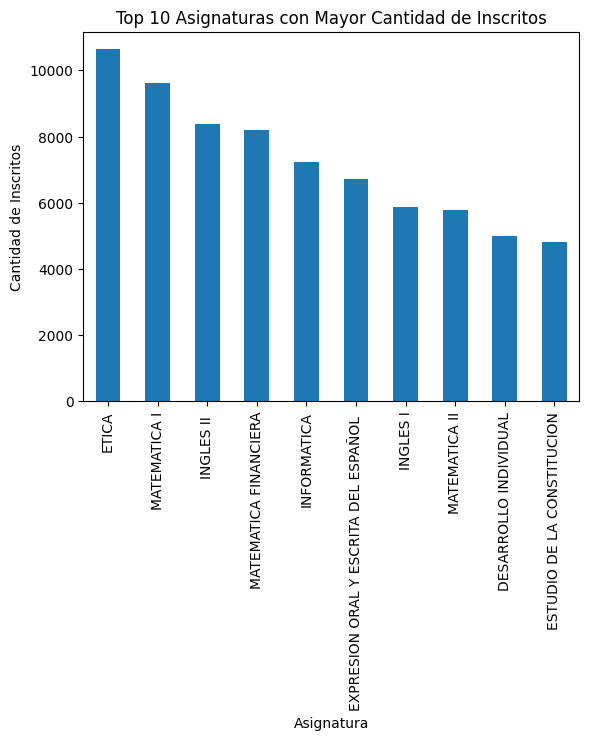

In [5]:
# 2. Cuales son las 10 Asignatura con mayor cantidad de Estudiantes Inscritos?

top10 = df.groupby('Asignatura')['inscritos_materia'].sum().sort_values(ascending=False).head(10)
top10.plot(kind='bar')
plt.title('Top 10 Asignaturas con Mayor Cantidad de Inscritos')
plt.xlabel('Asignatura')
plt.ylabel('Cantidad de Inscritos')
plt.show()

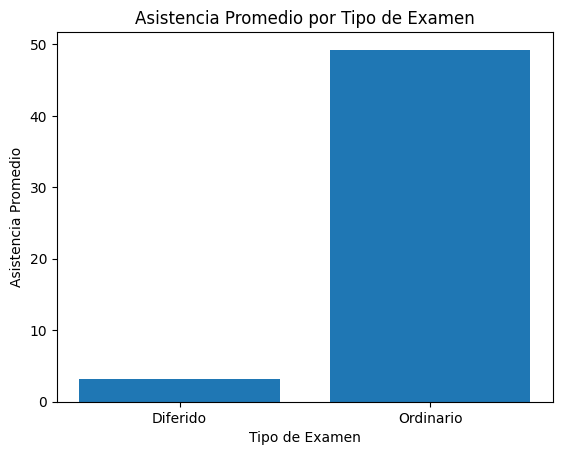

In [6]:
# 3. Cuál es la asistencia promedio por tipo de examen?

asistencia_promedio = df.groupby('TipoExamen')['asistencia'].mean()
plt.bar(asistencia_promedio.index, asistencia_promedio.values)
plt.title('Asistencia Promedio por Tipo de Examen')
plt.xlabel('Tipo de Examen')
plt.ylabel('Asistencia Promedio')
plt.show()

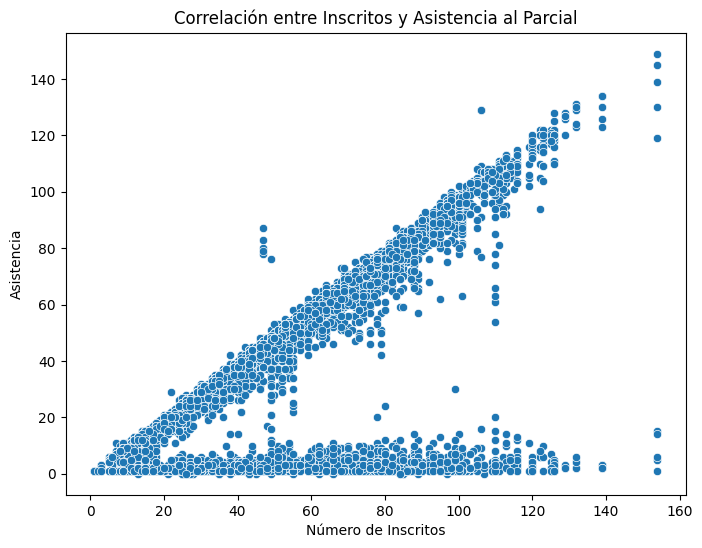

La correlación entre el número de inscritos y la asistencia al parcial es: 0.5672256096208137


In [7]:
# 4. Correlación entre el número de inscritos y la asistencia al parcial?

import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='inscritos_materia', y='asistencia', data=df)
plt.title('Correlación entre Inscritos y Asistencia al Parcial')
plt.xlabel('Número de Inscritos')
plt.ylabel('Asistencia')
plt.show()

correlacion = df['inscritos_materia'].corr(df['asistencia'])
print(f"La correlación entre el número de inscritos y la asistencia al parcial es: {correlacion}")

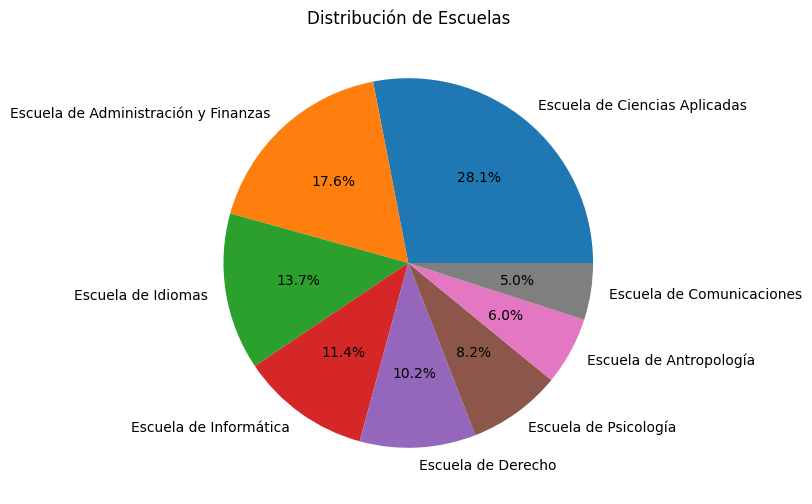

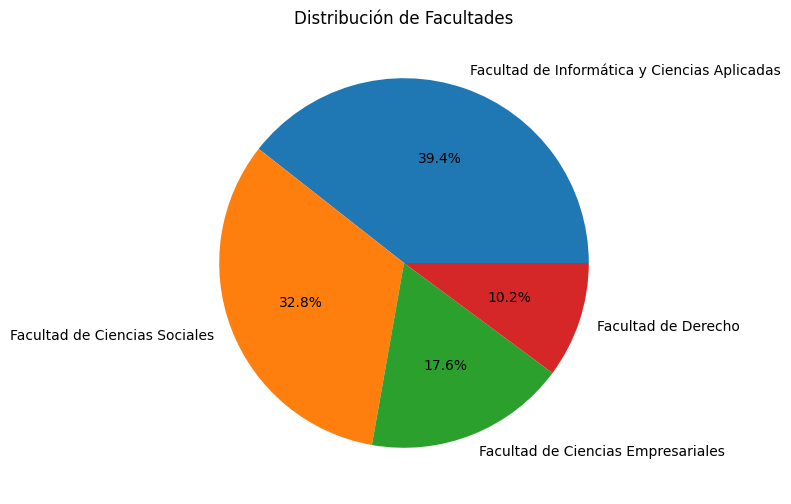

In [8]:
# 5. Cuál es la distribución de escuelas y facultades en el conjunto de datos?

# Distribución de Escuelas
plt.figure(figsize=(10, 6))
df['Escuela'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Escuelas')
plt.ylabel('')
plt.show()

# Distribución de Facultades
plt.figure(figsize=(10, 6))
df['Facultad'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Facultades')
plt.ylabel('')
plt.show()

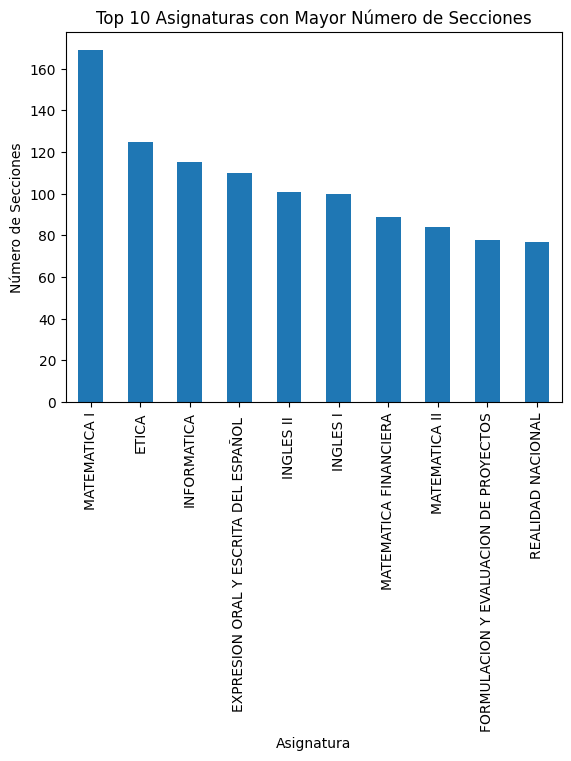

In [11]:
# 6. Cuales son las 10 Asignatura con mayor numero de secciones?

top10_secciones = df.groupby('Asignatura')['Seccion'].count().sort_values(ascending=False).head(10)
top10_secciones.plot(kind='bar')
plt.title('Top 10 Asignaturas con Mayor Número de Secciones')
plt.xlabel('Asignatura')
plt.ylabel('Número de Secciones')
plt.show()

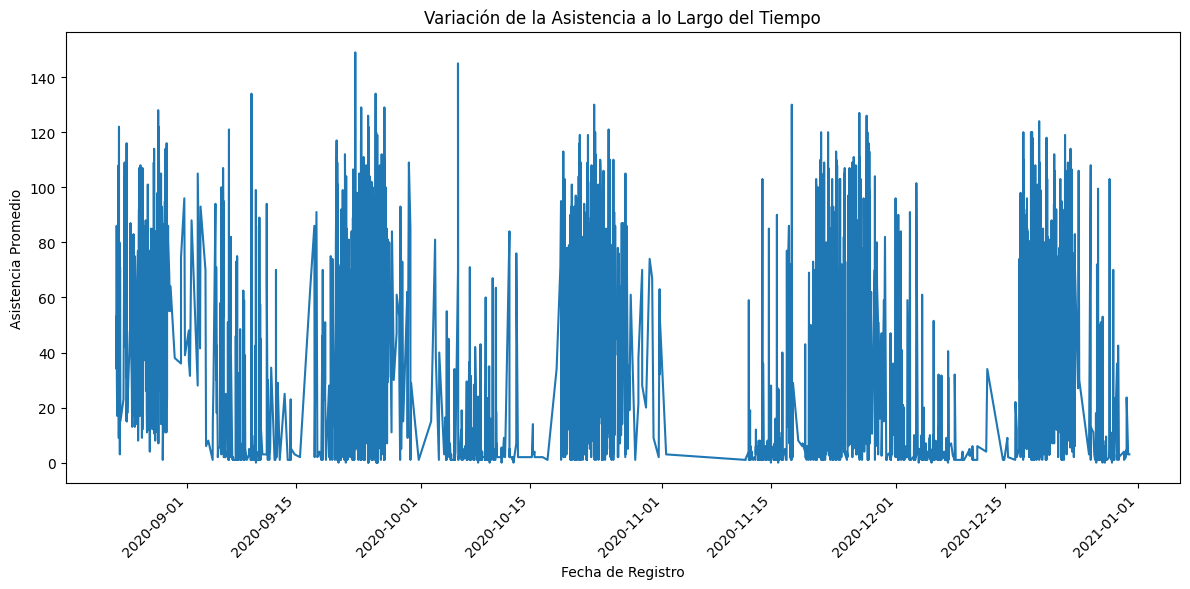

In [12]:
# 7. Cómo varía la asistencia a lo largo del tiempo (según la fecha de registro)?

df['Fecha_Registro'] = pd.to_datetime(df['Fecha_Registro'], format='%d/%m/%Y %H:%M')
asistencia_tiempo = df.groupby('Fecha_Registro')['asistencia'].mean()
plt.figure(figsize=(12, 6))
plt.plot(asistencia_tiempo.index, asistencia_tiempo.values)
plt.title('Variación de la Asistencia a lo Largo del Tiempo')
plt.xlabel('Fecha de Registro')
plt.ylabel('Asistencia Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

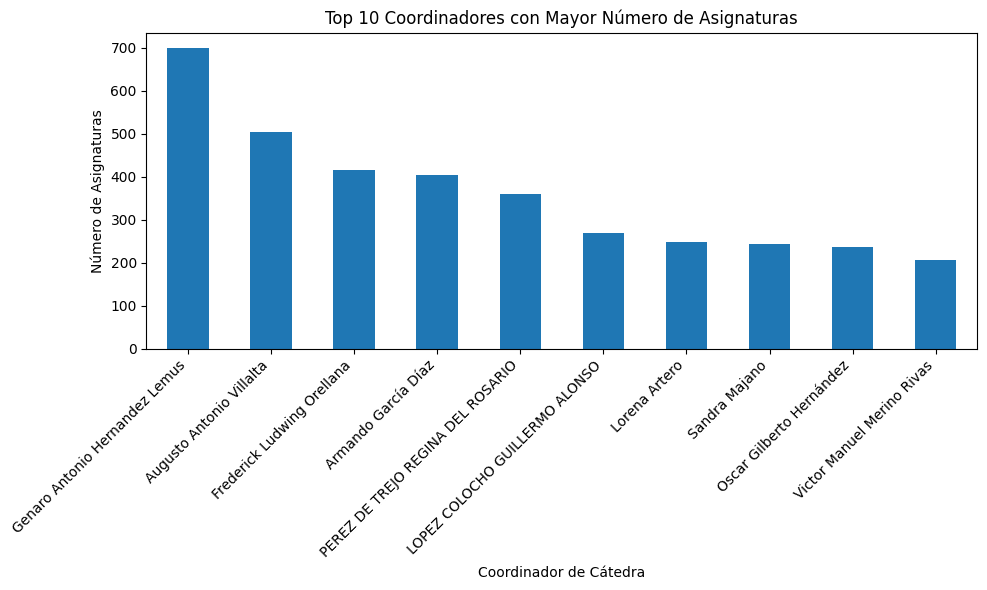

In [14]:
# 8. Cuáles son los coordinadores de cátedra con mayor número de asignaturas a su cargo?

top_coordinadores = df['Coordinador_Catedratico'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_coordinadores.plot(kind='bar')
plt.title('Top 10 Coordinadores con Mayor Número de Asignaturas')
plt.xlabel('Coordinador de Cátedra')
plt.ylabel('Número de Asignaturas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

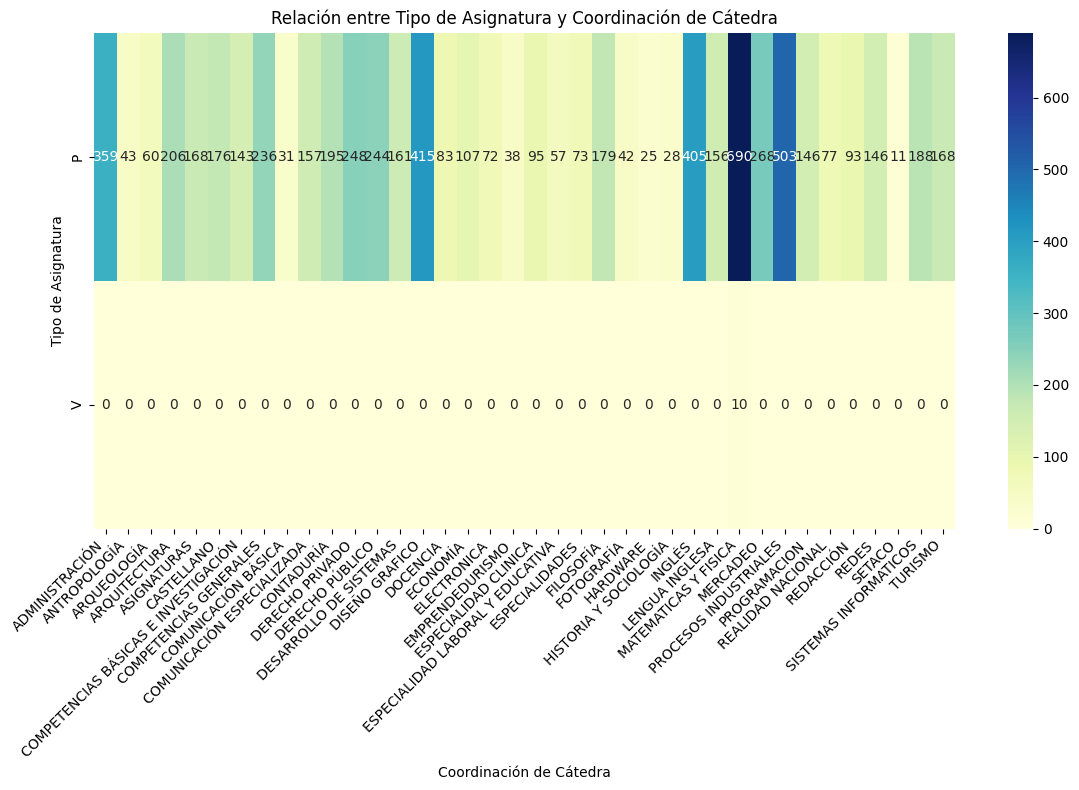

In [16]:
# 9. Hay alguna relación entre el tipo de asignatura y la coordinación de cátedra?
import seaborn as sns

tabla_cruzada = pd.crosstab(df['tipo_asignatura'], df['Coordinacion_Catedra'])
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_cruzada, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Relación entre Tipo de Asignatura y Coordinación de Cátedra')
plt.xlabel('Coordinación de Cátedra')
plt.ylabel('Tipo de Asignatura')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

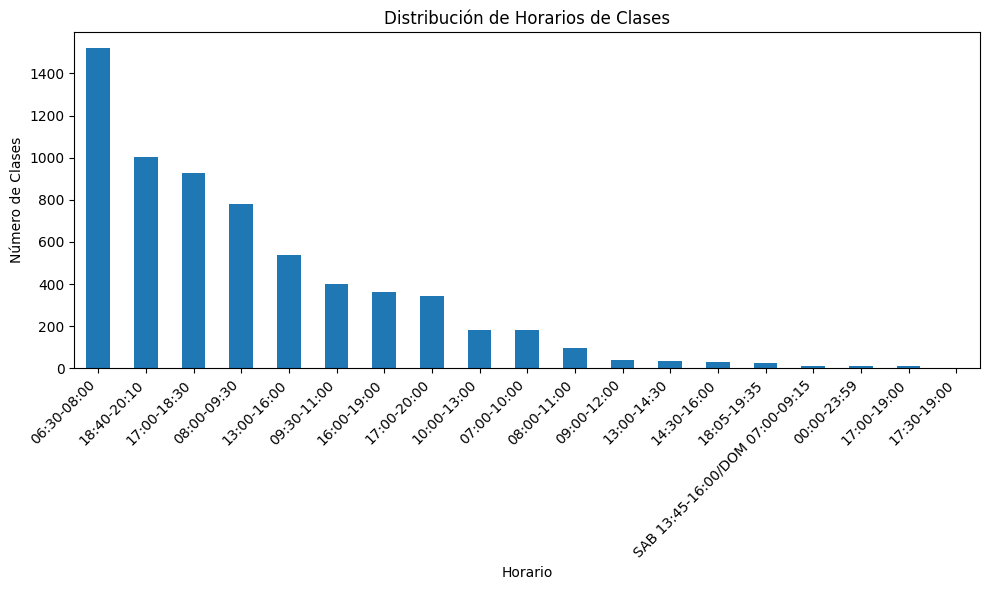

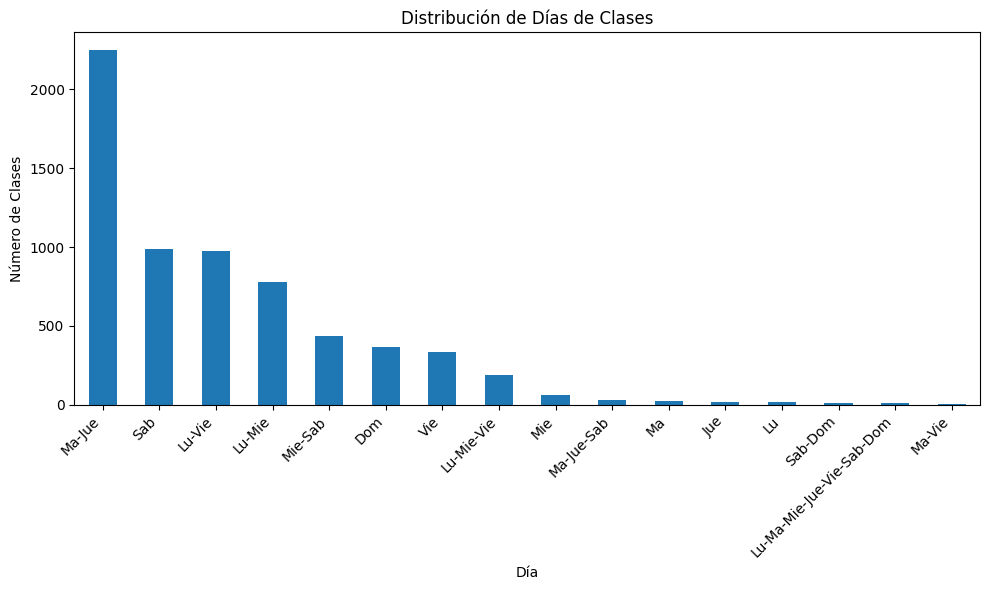

In [17]:
# 10. Cómo se distribuyen los horarios y días de las clases?

# Distribución de Horarios
plt.figure(figsize=(10, 6))
df['Horario'].value_counts().plot(kind='bar')
plt.title('Distribución de Horarios de Clases')
plt.xlabel('Horario')
plt.ylabel('Número de Clases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Distribución de Días
plt.figure(figsize=(10, 6))
df['Dias'].value_counts().plot(kind='bar')
plt.title('Distribución de Días de Clases')
plt.xlabel('Día')
plt.ylabel('Número de Clases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()